In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pe
import numpy as np
import plotly.graph_objects as gp
# importing libraries as per need

In [81]:
data = pd.read_csv('F:/Python Projects/CombineDailyActivity.csv') # freely available in kaggle

In [82]:
data.head() # head() gives first five rows of each columns

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [83]:
print(data.info()) # gives details about columns including their name, dtype, and content type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

In [84]:
# we can see 1397 of data rows doesn't contain null values. And most of the data are of float, int or object type.
# Activity date is saved as a object which needs to be changed to datetime type.

In [85]:
print(data.isnull().sum()) # returns number of missing values in the dataset, in this case dataframe

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [86]:
# this shows that there are no null values in the dataset

In [87]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        1397 non-null   int64         
 1   ActivityDate              1397 non-null   datetime64[ns]
 2   TotalSteps                1397 non-null   int64         
 3   TotalDistance             1397 non-null   float64       
 4   TrackerDistance           1397 non-null   float64       
 5   LoggedActivitiesDistance  1397 non-null   float64       
 6   VeryActiveDistance        1397 non-null   float64       
 7   ModeratelyActiveDistance  1397 non-null   float64       
 8   LightActiveDistance       1397 non-null   float64       
 9   SedentaryActiveDistance   1397 non-null   float64       
 10  VeryActiveMinutes         1397 non-null   int64         
 11  FairlyActiveMinutes       1397 non-null   int64         
 12  LightlyActiveMinutes

In [89]:
data.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [90]:
data['TotalMinutes']=data['VeryActiveMinutes'] + data['FairlyActiveMinutes']+ data['LightlyActiveMinutes']+ data['SedentaryMinutes']

In [91]:
print(data['TotalMinutes'].head(5))

0    1054
1     968
2     934
3    1363
4    1062
Name: TotalMinutes, dtype: int64


In [92]:
print(data['TotalMinutes'].head(5))

0    1054
1     968
2     934
3    1363
4    1062
Name: TotalMinutes, dtype: int64


In [93]:
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  1.397000e+03                           1397   1397.000000   
mean   4.781210e+09  2016-04-19 01:26:35.132426496   7280.898354   
min    1.503960e+09            2016-03-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-09 00:00:00   3146.000000   
50%    4.445115e+09            2016-04-19 00:00:00   6999.000000   
75%    6.962181e+09            2016-04-30 00:00:00  10544.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.384293e+09                            NaN   5214.336113   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count    1397.000000      1397.000000               1397.000000   
mean        5.219434         5.192219                  0.131481   
min         0.000000         0.000000                  0.000000   
25%         2.170000         2.160000                  0.000000   
50%         4.950000         4.950000               

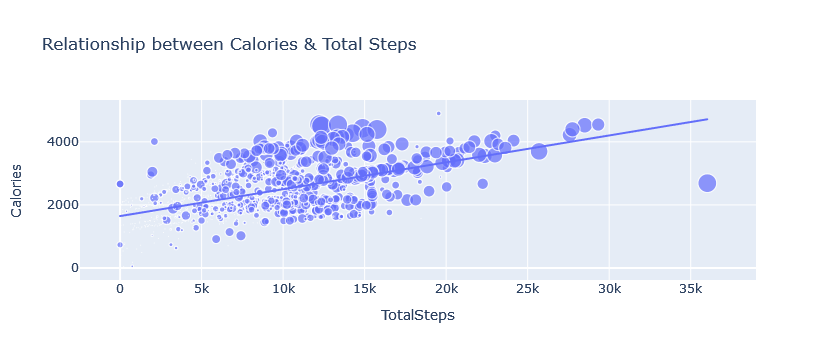

In [94]:
figure = pe.scatter(data_frame = data, y="Calories",
                    x="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()


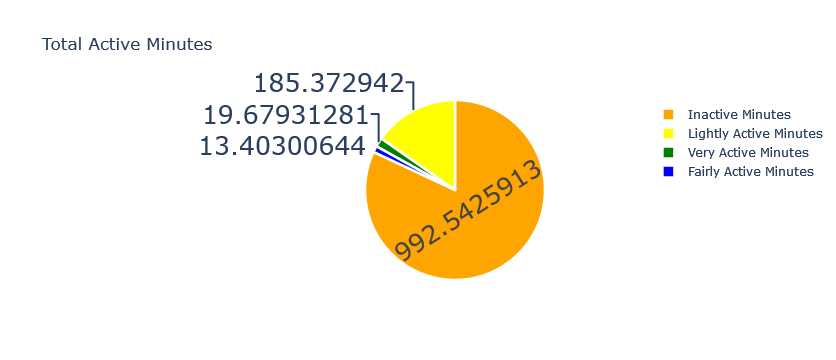

In [95]:
Activity_type= ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Inactive Minutes"]
counts= data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes","SedentaryMinutes"]].mean()
colors= ['Green', 'blue', 'yellow','orange']
pei= gp.Figure(data=[gp.Pie(labels=Activity_type, values= counts)])
pei.update_layout(title_text="Total Active Minutes")
pei.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size= 25,
                  marker=dict(colors=colors, line= dict(color='white',width=2.5)))
pei.show()

In [96]:
data['day']=data["ActivityDate"].dt.day_name()
print(data['day'].head())

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: day, dtype: object
